<a href="https://colab.research.google.com/github/CpSquared/Improving-Virtual-Colliders/blob/master/CA_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Sample Notebook

In [2]:
%tensorflow_version 2.x
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy.stats import chisquare


In [3]:
# How To Load Data with Public Shareable Link on to Google Colab : Source : https://medium.com/@acpanjan/download-google-drive-files-using-wget-3c2c025a8b99

# We First download the Data into the external Hardware Google Colab operates on, by accessing it's terminal using "!"
# To Download this data , which is uploaded in Google Drive ( Doesnt matter whose Google account), IMPORTANT : Link sharing should be public for the required file
# i.e. Anyone on internet can view the file should be turned on, once it is done, get the shareable link of the file 

# Read the Source link at the start for Details, for our case, data files are less than 100 MB, so we can download them by typing in terminal following command
# wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=FILEID' -O FILENAME

# I have saved the FileID of files we will be using below, it is the portion between d/ AND /view in the public Shareable link of file
# FILENAME can be custom according to our choice and is temporary
# NOTE : TO ACCESSS TERMINAL OF EXTERNAL HARDWARE USE " ! " BEFORE ANY COMMAND

# https://drive.google.com/file/d/18tRFuLFRB9KKIxkiK2xSvyd56SDKxxf4/view?usp=sharing # Shareable Link for C2P_new.npy data
# Corresponding FileID = 18tRFuLFRB9KKIxkiK2xSvyd56SDKxxf4

# https://drive.google.com/file/d/1znFSg4Y1YxggZ3T5q_fWWhtO0UNoOL4t/view?usp=sharing # Shareable Link for Particle_IDs_only.txt
# Corresponfing FileID = 1znFSg4Y1YxggZ3T5q_fWWhtO0UNoOL4t

In [4]:
# This Cell Block Basically Loads the required Data into our Google Colab
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=18tRFuLFRB9KKIxkiK2xSvyd56SDKxxf4' -O data2
data=np.load('/content/data2')
data.shape

--2020-08-14 19:49:03--  https://docs.google.com/uc?export=download&id=18tRFuLFRB9KKIxkiK2xSvyd56SDKxxf4
Resolving docs.google.com (docs.google.com)... 173.194.217.138, 173.194.217.113, 173.194.217.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.217.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5l8ftnpoifotom91l5nahk10ut6re5jk/1597434525000/01943902717425658767/*/18tRFuLFRB9KKIxkiK2xSvyd56SDKxxf4?e=download [following]
--2020-08-14 19:49:05--  https://doc-0g-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5l8ftnpoifotom91l5nahk10ut6re5jk/1597434525000/01943902717425658767/*/18tRFuLFRB9KKIxkiK2xSvyd56SDKxxf4?e=download
Resolving doc-0g-b4-docs.googleusercontent.com (doc-0g-b4-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to doc-0g-b4-docs.googleusercontent.com (doc-0g

(826785, 8)

In [5]:
# First I reshape Data such that every row contains variables corresponding to the same Decay event only
# Different Rows represent different Decay Events
data=data.reshape((int(data.shape[0]/3),int(data.shape[1]*3)))
data.shape

(275595, 24)

In [6]:
# Details of how Data is stored 
#  
#  data now is a 2D numpy array , number of rows =  275595  number of columns = 24, index = 0,1 ....,23 
#  every row contains variables corresponding to the same Decay event only
#  Different Rows represent different Decay Events
#  Indexing of Colums with different variables is as following
#
#
#              |  Main Evenet Number  |  PDG ID    |  Energy  | Px  | Py | Pz  | Invariant Mass | On Shell Condition Value ( should be zero for real particles)   
#              ________________________________________________________________________________________________________________________________________________
#    Cluster   |      0               |     1      |   2      |  3  |  4 |  5  |       6        |        7
#  Particle 1  |      8               |     9      |   10     |  11 | 12 |  13 |       14       |       15  
#  Particle 2  |      16              |    17      |   18     |  19 | 20 |  21 |       22       |       23
#



In [7]:
# Writing a cell block which will extract only those events where both particles are either pi+/pi-/pi0
# Thier PDG IDs are 211 , -211 , 111 resp
# data.shape[0] = 275595
i=0 
k=0
data_pi = zeros((1,24))                # Create a temporary row of zerores
while i < data.shape[0]:               # Go through each row of data
  set=[9,17]  # Index of particle IDs
  flag=0   # counter
  for j in set:
    if (data[i][j]==211 or data[i][j]==-211 or data[i][j]==111):          # Increase the counter if particle is pi+ || pi- || pi0
      flag=flag+1
  if flag==2 :                                  # Separate the events where both particles are pions, counter should be 2
    t = data[i].reshape((1,24))
    data_pi = np.concatenate((data_pi,t))       # Concatenate
  i=i+1
data_pi = np.delete(data_pi,0,axis=0)        # Delete the first temporary row of zerores

In [8]:
data_pi.shape[0]           # Number of pion only events
  

14761

In [9]:
# Following Cell Block will Separate the only Pion decays into further sub categories listed further 

In [10]:
i=0
k=0
data_pi_2 = zeros((1,24))             # Create a temporary row of zerores
data_pi_3 = zeros((1,24))             # Create a temporary row of zerores
data_pi_4 = zeros((1,24))             # Create a temporary row of zerores
data_pi_5 = zeros((1,24))             # Create a temporary row of zerores
data_pi_6 = zeros((1,24))             # Create a temporary row of zerores
data_pi_7 = zeros((1,24))             # Create a temporary row of zerores
while i < data_pi.shape[0]:
  set=[9,17]
  c1=0 # counter for pi+
  c2=0 # counter for pi-
  c3=0 # counter for pi0
  for j in set:
    if (data_pi[i][j]==211):      # increment c1 if it is pi+
      c1=c1+1
    if (data_pi[i][j]==-211):       # increment c2 if it is pi-
      c2=c2+1
    if (data_pi[i][j]==111):     # increment c3 if it is pi0
      c3=c3+1  

  if (c1==1 and c2==1):                              # Separate the decays with  pi+ and pi-
    t = data_pi[i].reshape((1,24))
    data_pi_2 = np.concatenate((data_pi_2,t))        
  elif (c3==2):                                      # Separate the decays with  2 pi0
    t = data_pi[i].reshape((1,24))
    data_pi_3 = np.concatenate((data_pi_3,t))        
  elif (c2==2):                                      # Separate the decays with  2 pi-
    t = data_pi[i].reshape((1,24))
    data_pi_4 = np.concatenate((data_pi_4,t))        
  elif (c1==2):                                      # Separate the decays with  2 pi+
    t = data_pi[i].reshape((1,24))
    data_pi_5 = np.concatenate((data_pi_5,t))        
  elif (c2==1 and c3==1):                            # Separate the decays with  pi0 and pi-
    t = data_pi[i].reshape((1,24))
    data_pi_6 = np.concatenate((data_pi_6,t))        
  elif (c3==1 and c1==1):                            # Separate the decays with  pi0 and pi+
    t = data_pi[i].reshape((1,24))
    data_pi_7 = np.concatenate((data_pi_7,t))        
  else:                                              # This should never be reached if we succesfully extracted pion decays only
    k=k+1
       
  i=i+1
data_pi_2 = np.delete(data_pi_2,0,axis=0)         # Delete the first temporary rows of zerores
data_pi_3 = np.delete(data_pi_3,0,axis=0)         # Delete the first temporary rows of zerores
data_pi_4 = np.delete(data_pi_4,0,axis=0)         # Delete the first temporary rows of zerores
data_pi_5 = np.delete(data_pi_5,0,axis=0)         # Delete the first temporary rows of zerores  
data_pi_6 = np.delete(data_pi_6,0,axis=0)         # Delete the first temporary rows of zerores 
data_pi_7 = np.delete(data_pi_7,0,axis=0)         # Delete the first temporary rows of zerores  

In [11]:
print(k)
print(data_pi_2.shape)
print(data_pi_3.shape)
print(data_pi_4.shape)
print(data_pi_5.shape)
print(data_pi_6.shape)
print(data_pi_7.shape)

0
(6468, 24)
(1566, 24)
(0, 24)
(0, 24)
(3372, 24)
(3355, 24)


In [12]:
# Different Data and what they Correspond to
#
# data_pi_2      Cluster Decays into  pi+ AND pi-
# data_pi_3      Cluster Decays into  pi0 AND pi0
# data_pi_4      Cluster Decays into  pi- AND pi-       # Most probably doesnt happen
# data_pi_5      Cluster Decays into  pi+ AND pi+       # Most probably doesnt happen
# data_pi_6      Cluster Decays into  pi0 AND pi-
# data_pi_7      Cluster Decays into  pi0 AND pi+
#
#
# Let us Concern ourselves with only pi+ AND pi- decays only, thus data_pi_2 will be used 
# mass = 139.57 MeV , for both pi+ and pi-  ( # 139.57039 accurately )
# mass = 134.9768  MeV , for pi0

In [13]:
tempdata = data_pi_2/1000  # We import the Data of pi+ and pi- only into our temporary data that we work on

In [14]:
m = 139.57

In [15]:
# Following cell block Generates n Real Samples
# That is, It extracts randomly, n rows from the temporary data we work on,
# it extracts specific variables only that we consider for analysis
# Following case : px , py, pz  of Cluster and a Particle are extracted, 
# thus shape of sample is (n,6)
# Indexing as follows : 
# 0,1,2 = px, py ,pz of Cluster
# 3,4,5 = px, py ,pz of 1st particle 

In [16]:
def generate_real_samples(n):
  i=0
  X1 = zeros((n,3))
  X2 = zeros((n,3))
  b=tempdata[np.random.choice(tempdata.shape[0], n, replace=False), :]
  while i < (n):
    set=[3,4,5] # index for px,py,pz of cluster
    for j in set:
      X1[i][j-3]=b[i][j] # store those values in sample
      
    set=[11,12,13] # index for px,py,pz of Particle (any one)
    for j in set:
      X2[i][j-11]=b[i][j] # store those values in sample
    
    i=i+1
  X = hstack((X1, X2))
  y = ones((n, 1)) 
  return X, y

In [17]:
# Following cell block Plots the histogram for Squared Trans. Momentum Distribution,
# For both Cluster & Particle # Cluster has color red and Particle has blue
# It takes as input the sample generated only, ( sample can be real or fake)

In [18]:
def display(X,Y):
  v=zeros((X.shape[0],2))  # Real Samples
  i=0
  while i < X.shape[0]:
    v[i][0]= (X[i][0]*X[i][0])+(X[i][1]*X[i][1]) # px*px + py*py for Cluster
    v[i][1]= (X[i][3]*X[i][3])+(X[i][4]*X[i][4]) # px*px + py*py for Particle
    v[i][0]= np.sqrt(v[i][0])  # pT of Cluster
    v[i][1]= np.sqrt(v[i][1])  # pT of 1st Particle
    i=i+1
 

  w=zeros((Y.shape[0],2))  # Fake Samples
  i=0
  while i < Y.shape[0]:
    w[i][0]= (Y[i][0]*Y[i][0])+(Y[i][1]*Y[i][1]) # px*px + py*py for Cluster
    w[i][1]= (Y[i][3]*Y[i][3])+(Y[i][4]*Y[i][4]) # px*px + py*py for Particle
    w[i][0]= np.sqrt(w[i][0])  # pT of Cluster
    w[i][1]= np.sqrt(w[i][1])  # pT of 1st Particle
    i=i+1
  

  g=zeros((X.shape[0],1))          # For Real Samples
  i=0
  while i < X.shape[0]:
    g[i][0]= calcmsqr(X[i][0],X[i][1],X[i][2],X[i][3],X[i][4],X[i][5],.13957,.13957)  # Calc Sq. Mass of cluster
    g[i][0]= np.sqrt(g[i][0])    # Mass of Cluster
    i=i+1
  
  h=zeros((Y.shape[0],1))         # For Fake Samples
  i=0
  while i < Y.shape[0]:
    h[i][0]= calcmsqr(Y[i][0],Y[i][1],Y[i][2],Y[i][3],Y[i][4],Y[i][5],.13957,.13957)  # Calc Sq. Mass of cluster
    h[i][0]= np.sqrt(h[i][0])   # Mass of Cluster
    i=i+1
  
 

  # Following lines just to Plot stuff
  
  fig, ax = plt.subplots(nrows=2,ncols= 2,figsize=(20, 10),sharex=True, sharey=True) 
  ax[0,0].hist(v[:,0],color='red',alpha=0.5,bins=np.linspace(0,1000*0.2*0.25*0.2,200),label='Cluster') # Red For Cluster
  ax[0,0].hist(v[:,1],color='blue',alpha=0.5,bins=np.linspace(0,1000*0.2*0.25*0.2,200),label='1st Particle')  # Blue for Particle
  ax[0,0].set_title('pT Distribution of Real samples',fontweight="bold",color='brown',fontsize=20)
  ax[0,0].set_xlabel("(pT/GeV)",fontweight="bold",color='black',fontsize=14)
  ax[0,0].set_ylabel(" Frequency of Occurence",fontweight="bold",color='black',fontsize=14)
  ax[0,0].legend()

  ax[0,1].hist(w[:,0],color='red',alpha=0.5,bins=np.linspace(0,1000*0.2*0.25*0.2,200),label='Cluster') # Red For Cluster
  ax[0,1].hist(w[:,1],color='blue',alpha=0.5,bins=np.linspace(0,1000*0.2*0.25*0.2,200),label='1st Particle')  # Blue for Particle
  ax[0,1].set_title('pT Distribution of Fake samples',fontweight="bold",color='brown',fontsize=20)
  ax[0,1].set_xlabel("(pT/GeV)",fontweight="bold",color='black',fontsize=14)
  ax[0,1].set_ylabel(" Frequency of Occurence",fontweight="bold",color='black',fontsize=14)
  ax[0,1].legend()

  ax[1,0].hist(g[:,0],color='green',bins=np.linspace(0,1000*0.2*0.25*0.2,200),alpha=0.5,label='Real') #
  ax[1,0].hist(h[:,0],color='purple',bins=np.linspace(0,1000*0.2*0.25*0.2,200),alpha=0.5,label='Fake')  # 
  ax[1,0].set_title('invariant mass of Cluster Distribution',fontweight="bold",color='brown',fontsize=20)
  ax[1,0].set_xlabel("(m/GeV)",fontweight="bold",color='black',fontsize=14)
  ax[1,0].set_ylabel(" Frequency of Occurence",fontweight="bold",color='black',fontsize=14)
  ax[1,0].legend()
  
  #ax[1,1].scatter(g[:,0],v[:,1],color='green',label='Real') #
  #ax[1,1].scatter(h[:,0],w[:,1],color='purple',label='Fake')  # 
  #ax[1,1].set_title('Sq. Cluster Mass VS Sq. pT of 1st Particle',fontweight="bold",color='brown',fontsize=20)
  #ax[1,1].set_xlabel("(pT/MeV)^2",fontweight="bold",color='black',fontsize=14)
  #ax[1,1].set_ylabel(" (m/MeV)^2",fontweight="bold",color='black',fontsize=14)
  #ax[1,1].legend() 
  
  ax[1,1].axis('off')
  
  #fig.subplots_adjust(hspace=1000)
  fig.tight_layout(pad =5)
  #plt.savefig('test_5.pdf')         #    These two lines to 
  #files.download('test_5.pdf')      #    Download data plots
  plt.show()

In [ ]:
# Just to check  # Ir-relevant
x_real, y_real = generate_real_samples(100)
x_fake, y_fake = generate_fake_samples(generator, latent_dim, 100)
display(x_real,x_fake)

In [19]:
# Following Cell Block Calculates Squared Invariant Mass of Cluster ( And Returns it)
#
# Inputs are : 
# 
# px,py,pz = 3 momenta of cluster
# px1, py1, pz1 = 3 momenta of 1st particle
# m1,m2 = Invariant masses of particles 

In [20]:
def calcmsqr(px,py,pz,px1,py1,pz1,m1,m2):
  t1 = (px1*px1)+(py1*py1)+(pz1*pz1)+(m1*m1) # E1*E1
  E1 = np.sqrt(t1)
  px2 = px-px1
  py2 = py-py1
  pz2 = pz-pz1
  t2 = (px2*px2)+(py2*py2)+(pz2*pz2)+(m2*m2) # E2*E2
  E2 = np.sqrt(t2)
  E = E1 + E2
  t3 = (E*E)-(px*px)-(py*py)-(pz*pz)
  return t3

In [21]:
# Following Cell Block prints the accuracy of Discriminator model for 100 samples
# It also plots the Squared pT Distribution for both real and fake samples
# Also prints Suared mass of cluster Distribution for both real & fake samples
# Also prints Squared mass of cluster VS Sq. pT of 1st Particle ; both real and fake

In [44]:
def summarize_performance(epoch, generator, discriminator, latent_dim, n=1000):
  # prepare real samples
  x_real, y_real = generate_real_samples(n)
  # evaluate discriminator on real examples
  _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
  x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
  # evaluate discriminator on fake examples
  _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
  # summarize discriminator performance
  print(epoch, acc_real, acc_fake)
  #display(x_real,x_fake)
  display2(x_real,x_fake)
  display3(x_real,x_fake)
  

In [23]:
# Rest of the GAN Model is almost same as Tutorial sent by Prof. Nachman
# Only modifications are :
# Increasesd the number of layers in both Discriminator & Generator model definition in proportion to number of inputs/number of outputs ( sample size )
# for sample size=6 , 6/2=3 , thus all layers increased three times
# increased the size of Latent Points Generated by factor of 3000
# latent_dim =15 ( can also be increased in proportion)
# n_epochs = 10000 , n_batch = 1024 , n_eval = 100

In [24]:
# define the standalone discriminator model
def define_discriminator(n_inputs=6):
  model = Sequential()
  model.add(Dense(75, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
  model.add(Dense(75, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
  model.add(Dense(1, activation='sigmoid'))
  # compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=6):
  model = Sequential()
  model.add(Dense(45, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
  model.add(Dense(45, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
  model.add(Dense(n_outputs, activation='linear'))
  return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n) 
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
  # generate points in latent space
  x_input = generate_latent_points(latent_dim, n)
  # predict outputs
  X = generator.predict(x_input)
  # create class labels
  y = zeros((n, 1))
  return X, y


In [25]:
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=1024, n_eval=1000):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)
		# evaluate the model every n_eval epochs
		if (i+1) % n_eval == 0:
			summarize_performance(i, g_model, d_model, latent_dim)

999 0.6669999957084656 0.8330000042915344


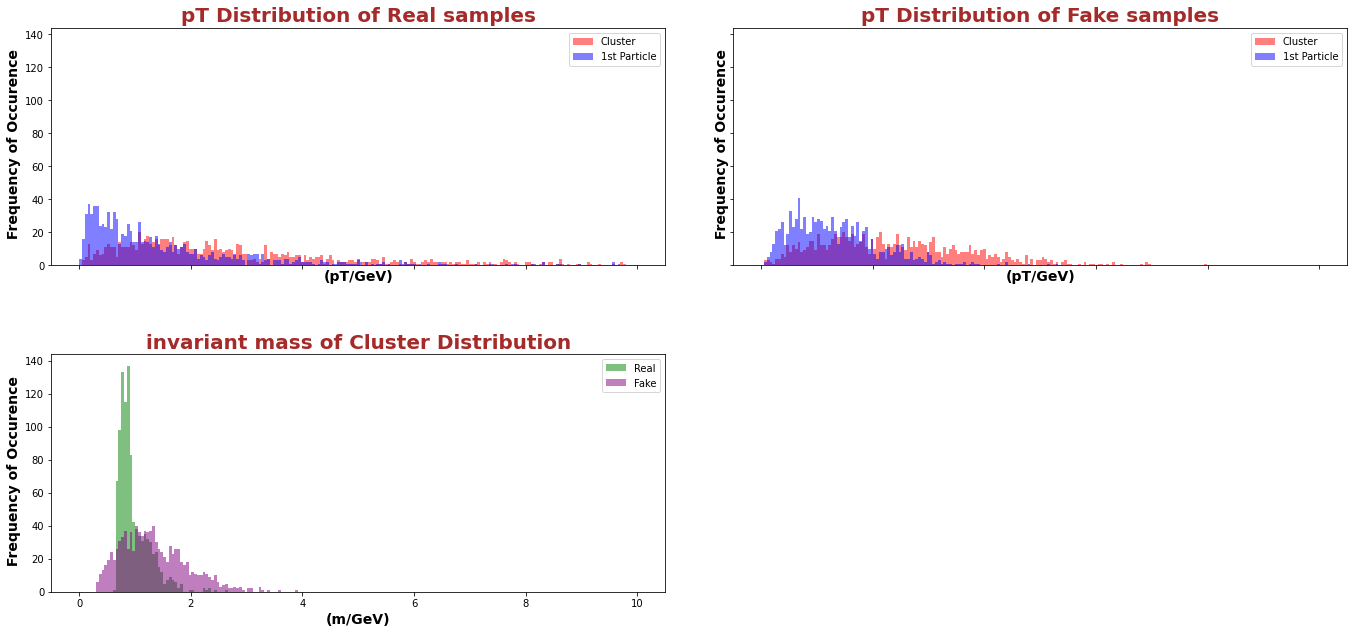

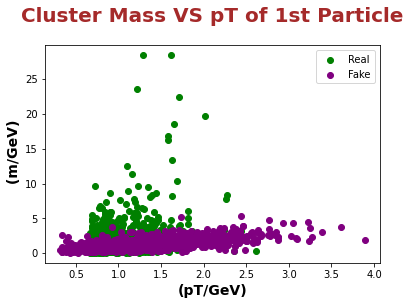

1999 0.20200000703334808 0.7289999723434448


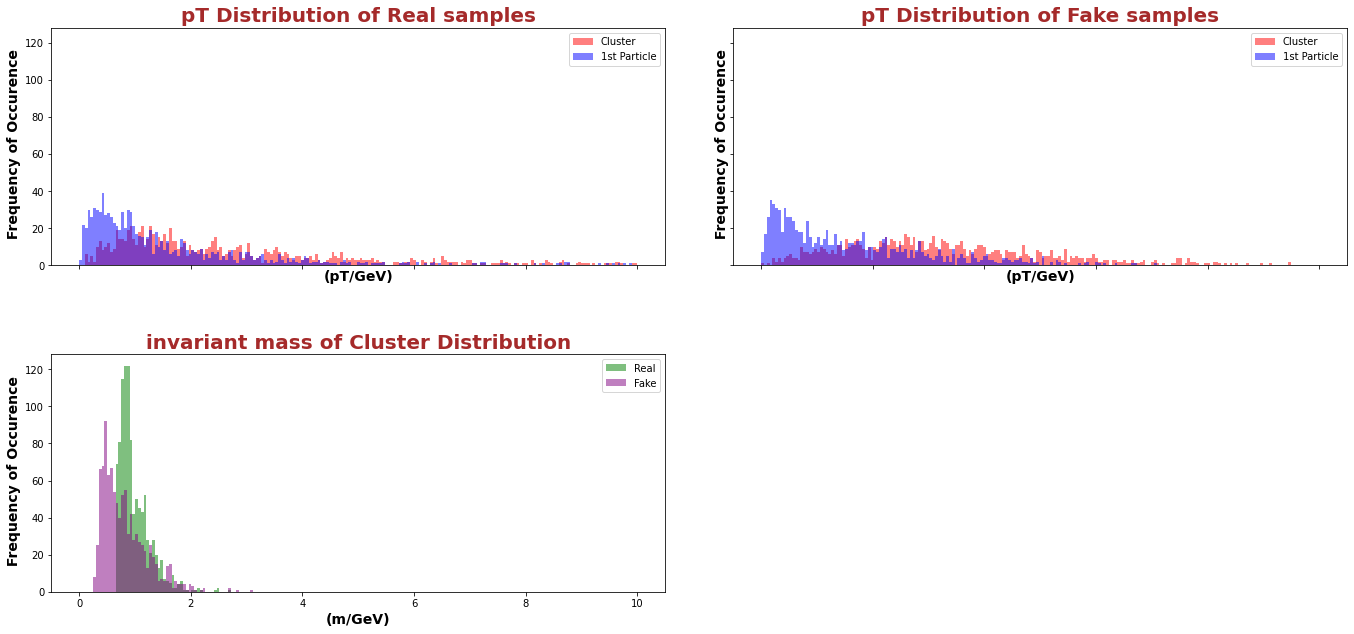

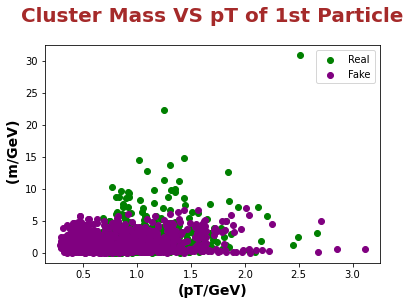

2999 0.48500001430511475 0.460999995470047


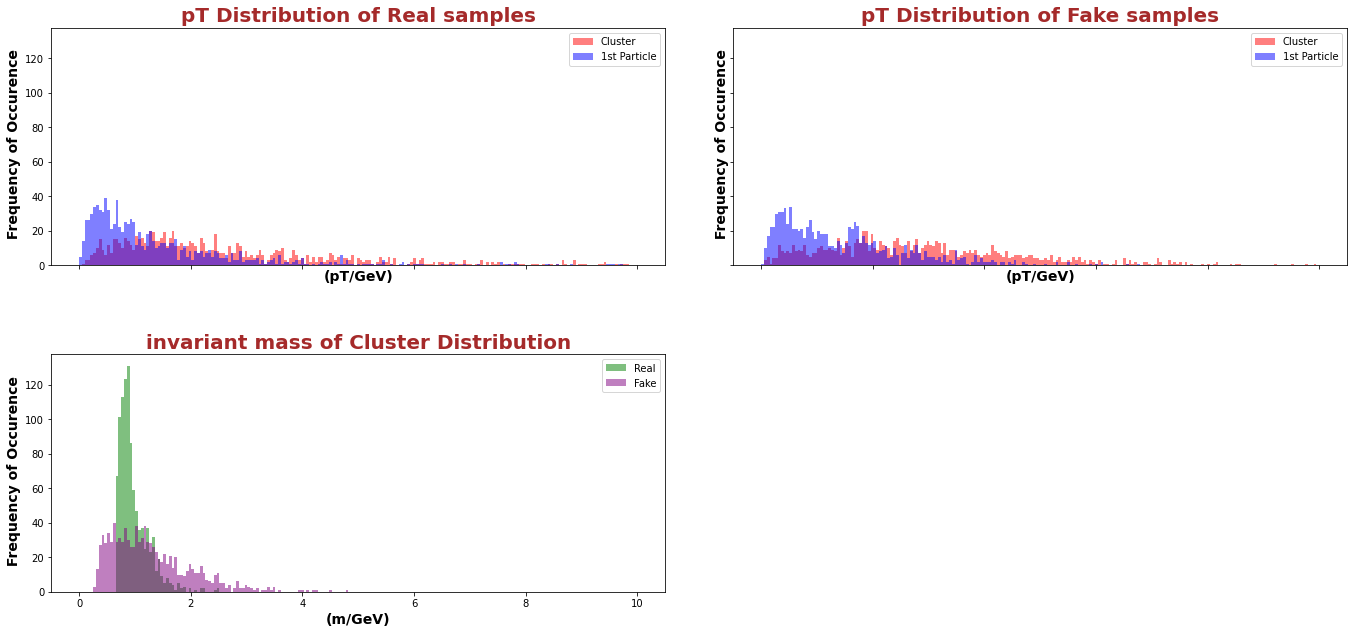

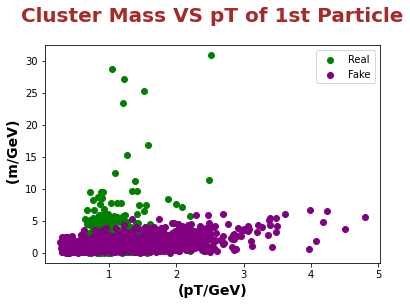

3999 0.460999995470047 0.5199999809265137


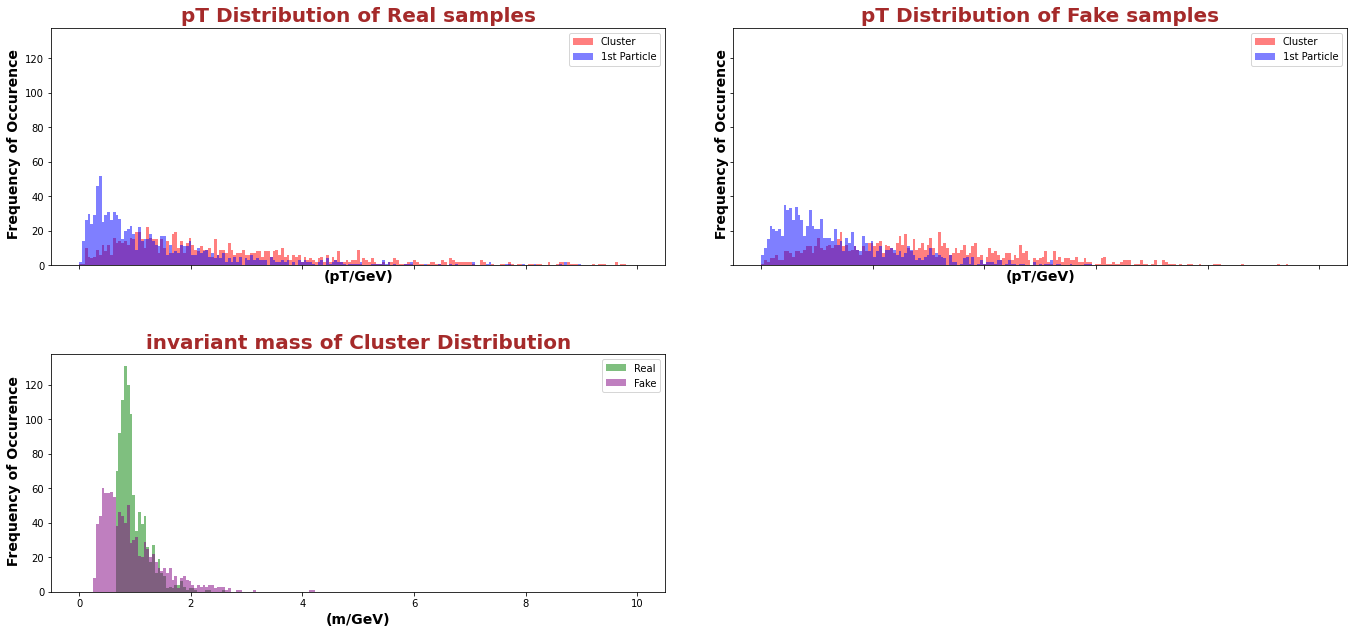

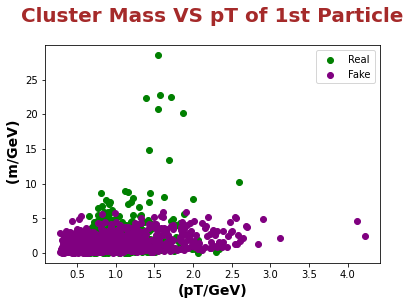

4999 0.4790000021457672 0.597000002861023


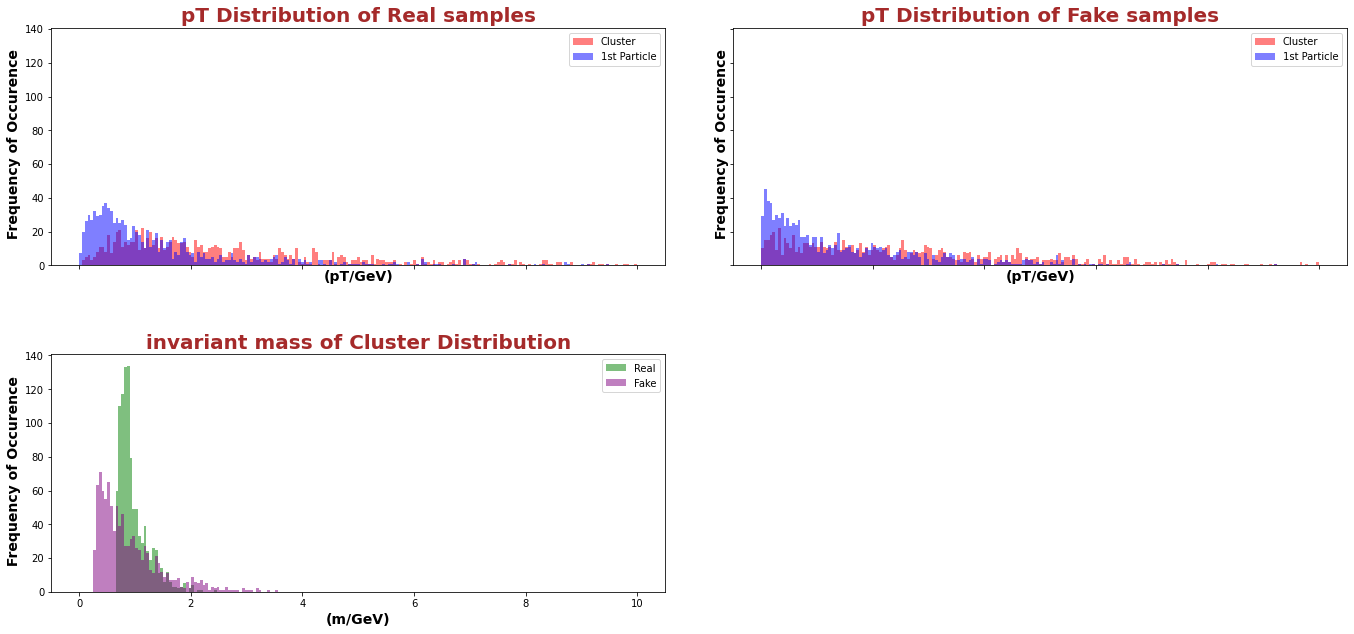

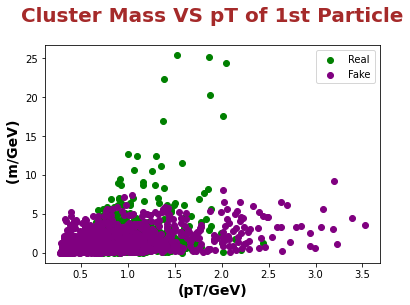

5999 0.3700000047683716 0.6159999966621399


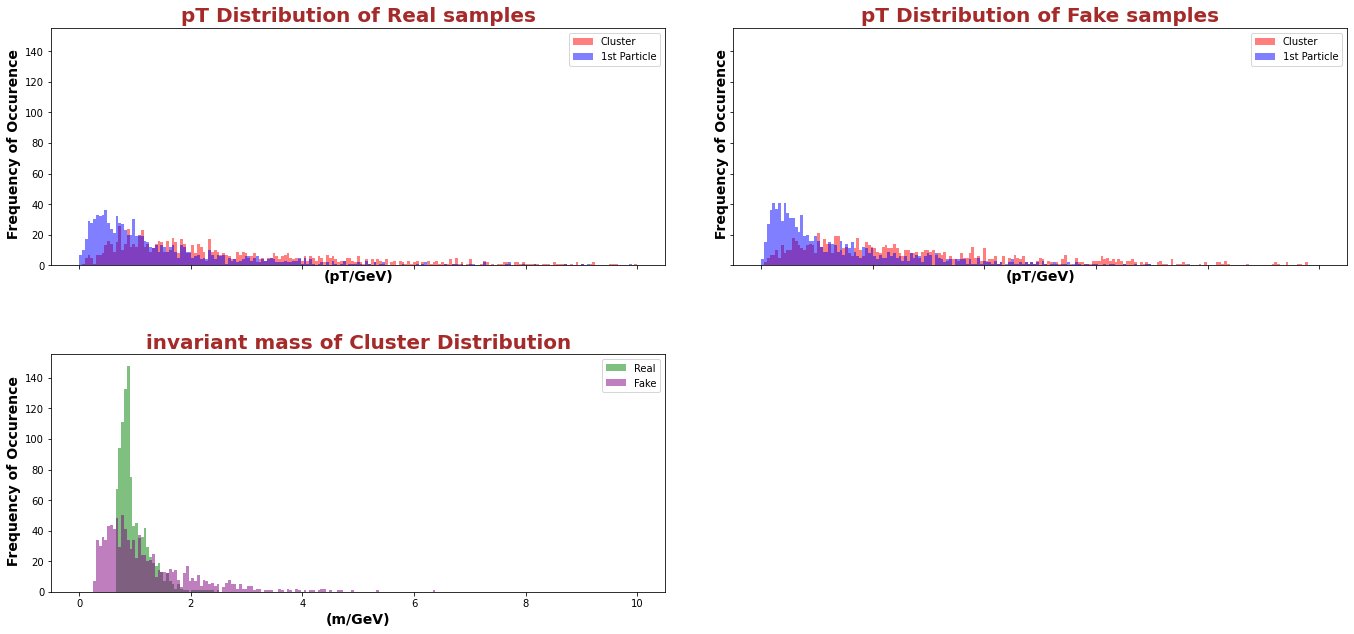

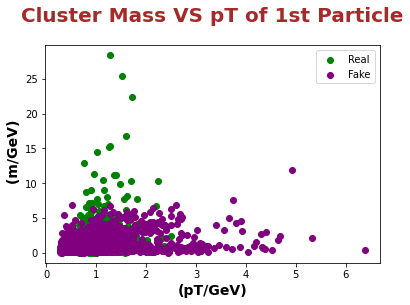

6999 0.5 0.5590000152587891


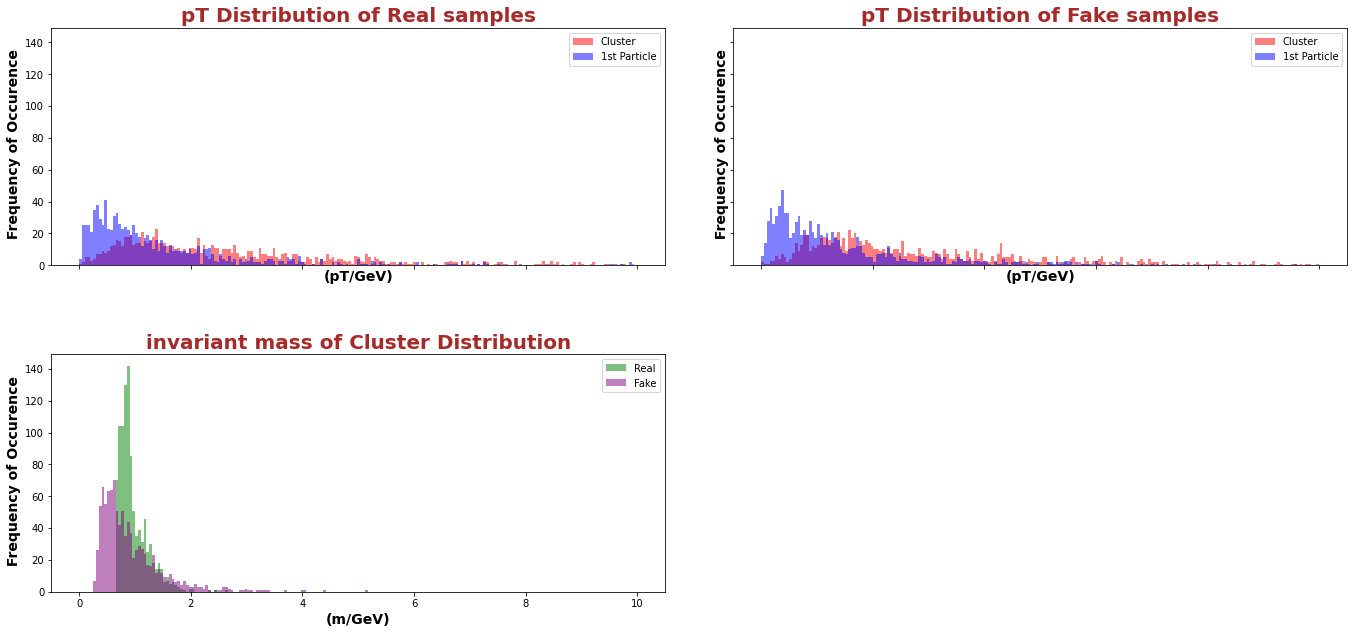

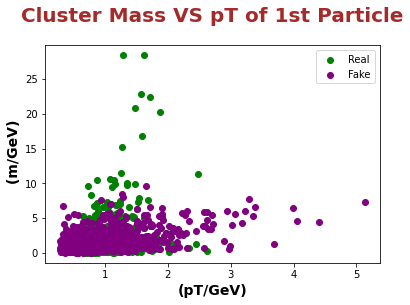

7999 0.38999998569488525 0.6690000295639038


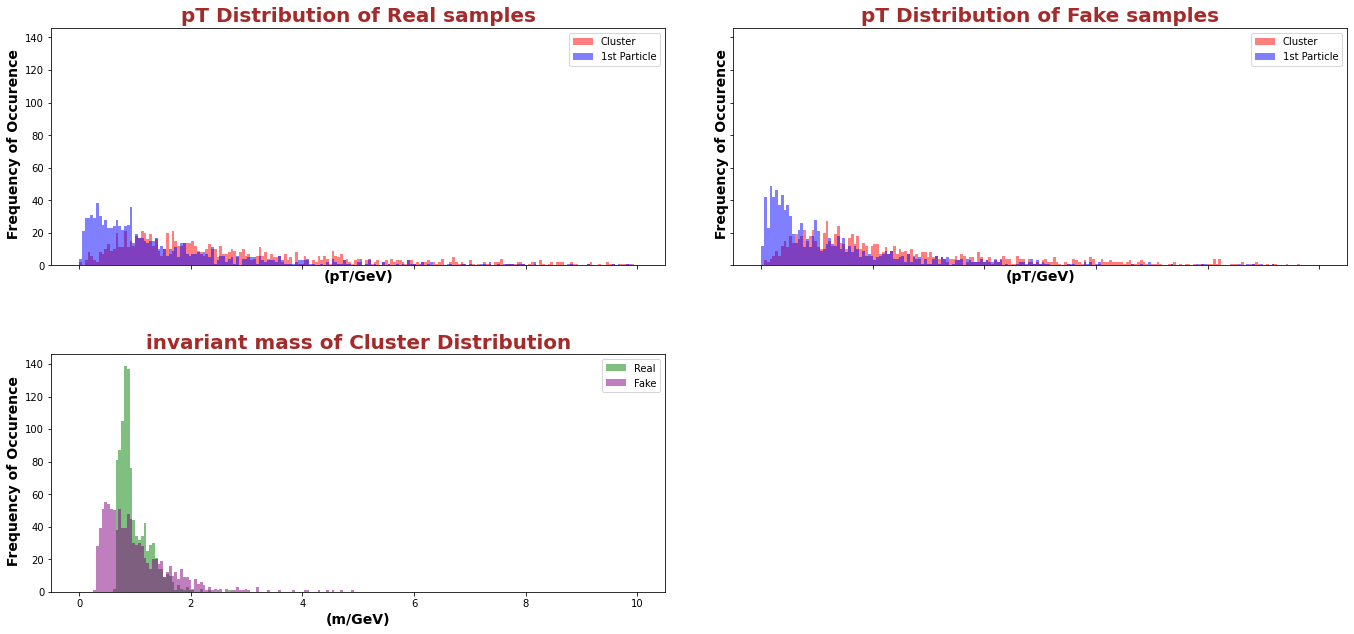

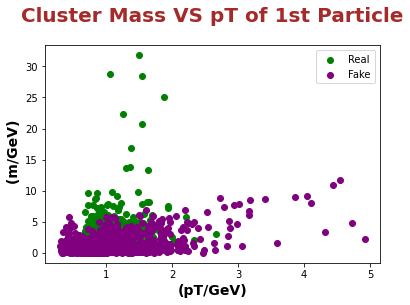

8999 0.45100000500679016 0.6299999952316284


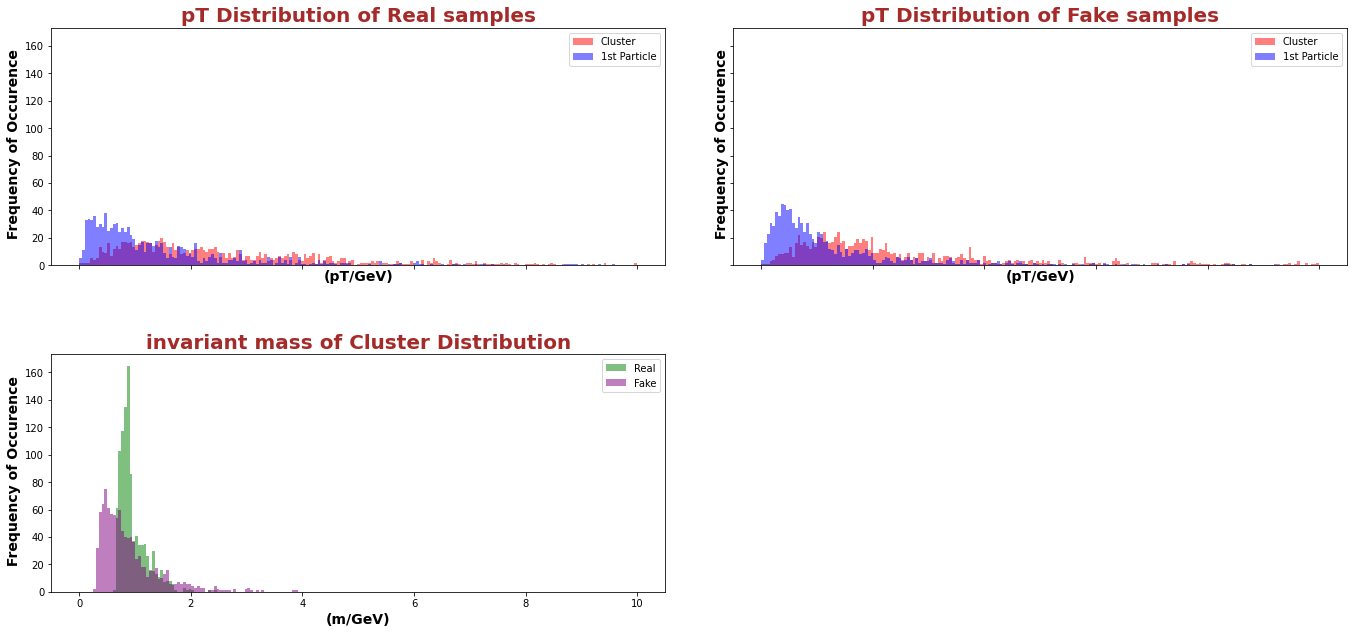

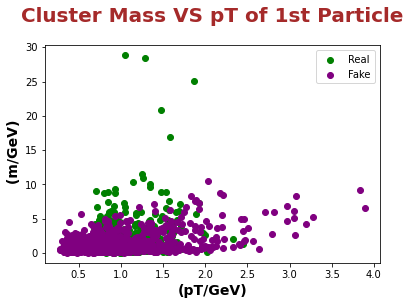

9999 0.3619999885559082 0.6980000138282776


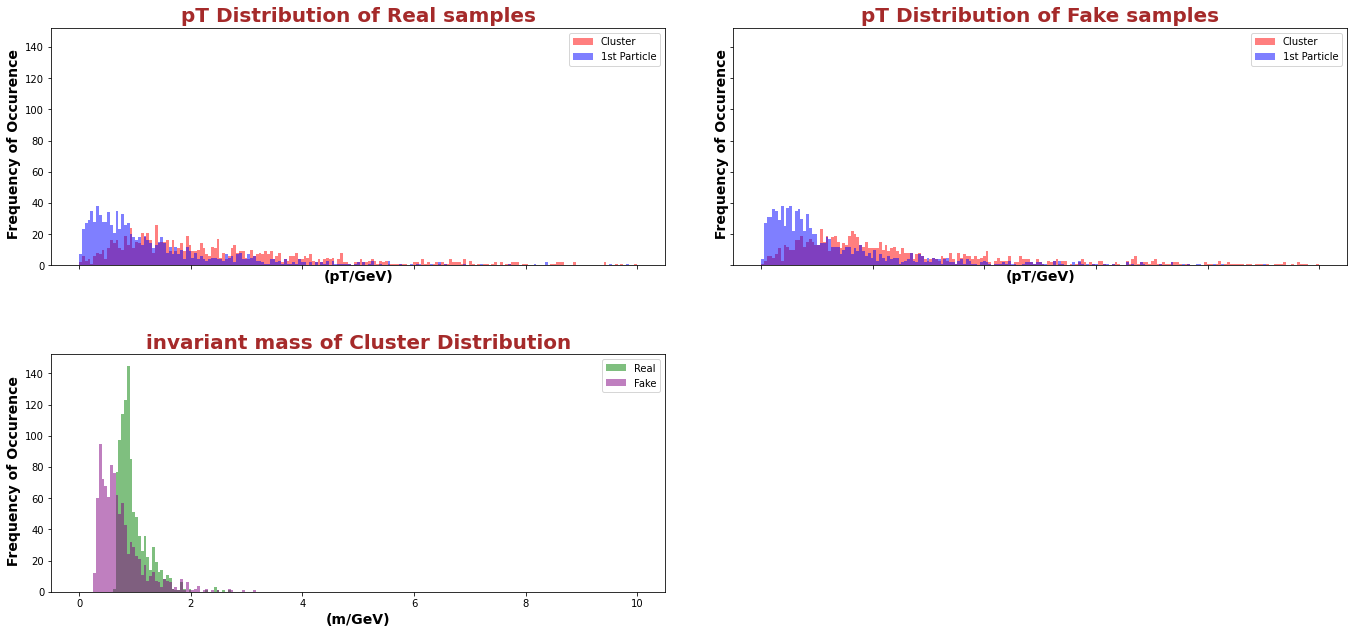

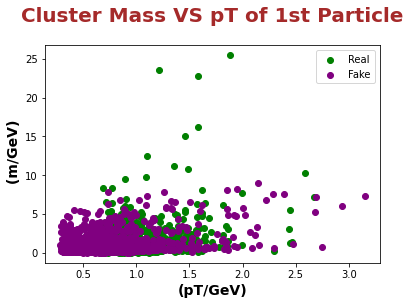

In [27]:
# size of the latent space
latent_dim = 15
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

In [28]:
# Following cell block generate fake samples and caluclate Squared mass of cluster values 
# Also finds the minimum squared mass of cluster in the fake samples = t1
# Physically, t1 > (139.57+139.57)^2 Thus, t1 > 77919.1396, which indeed turns out true, 
# Thus Fake samples arent violating M > (m1+m2) Condition

In [29]:
# This Cell Block Generates Large number of Fake Samples
# And calculates the Minimum value of Invariant mass of Cluster that is observed in fake samples in GeV
# It should be greater than .279 approx, having less than this value isnt physically possible

x,y = generate_fake_samples(generator,latent_dim,6000)
i=0
h = zeros((x.shape[0],1))
while i < x.shape[0]:
  h[i][0] = calcmsqr(x[i][0],x[i][1],x[i][2],x[i][3],x[i][4],x[i][5],.13957,.13957)
  h[i][0] = np.sqrt(h[i][0])
  i=i+1
t1=h[0][0]
i=0
while i < h.shape[0]:
  if (h[i][0]<t1):
    t1=h[i][0]
  i=i+1
print(t1)

0.2800664296442921


In [41]:
def display3(X,Y):
  v=zeros((X.shape[0],2))  # Real Samples
  i=0
  while i < X.shape[0]:
    v[i][0]= (X[i][0]*X[i][0])+(X[i][1]*X[i][1]) # px*px + py*py for Cluster
    v[i][1]= (X[i][3]*X[i][3])+(X[i][4]*X[i][4]) # px*px + py*py for Particle
    v[i][0]= np.sqrt(v[i][0])  # pT of Cluster
    v[i][1]= np.sqrt(v[i][1])  # pT of 1st Particle
    i=i+1
 

  w=zeros((Y.shape[0],2))  # Fake Samples
  i=0
  while i < Y.shape[0]:
    w[i][0]= (Y[i][0]*Y[i][0])+(Y[i][1]*Y[i][1]) # px*px + py*py for Cluster
    w[i][1]= (Y[i][3]*Y[i][3])+(Y[i][4]*Y[i][4]) # px*px + py*py for Particle
    w[i][0]= np.sqrt(w[i][0])  # pT of Cluster
    w[i][1]= np.sqrt(w[i][1])  # pT of 1st Particle
    i=i+1
  

  g=zeros((X.shape[0],1))          # For Real Samples
  i=0
  while i < X.shape[0]:
    g[i][0]= calcmsqr(X[i][0],X[i][1],X[i][2],X[i][3],X[i][4],X[i][5],.13957,.13957)  # Calc Sq. Mass of cluster
    g[i][0]= np.sqrt(g[i][0])    # Mass of Cluster
    i=i+1
  
  h=zeros((Y.shape[0],1))         # For Fake Samples
  i=0
  while i < Y.shape[0]:
    h[i][0]= calcmsqr(Y[i][0],Y[i][1],Y[i][2],Y[i][3],Y[i][4],Y[i][5],.13957,.13957)  # Calc Sq. Mass of cluster
    h[i][0]= np.sqrt(h[i][0])   # Mass of Cluster
    i=i+1
  
 

  # Following lines just to Plot stuff
  
  fig, ax = plt.subplots(nrows=2,ncols= 2,figsize=(20, 10),sharex=True, sharey=True) 
  a=ax[0,0].hist(v[:,0],color='red',alpha=0.5,bins=np.linspace(0,1000*0.2*0.25*0.2,200),label='Cluster') # Red For Cluster
  b=ax[0,0].hist(v[:,1],color='blue',alpha=0.5,bins=np.linspace(0,1000*0.2*0.25*0.2,200),label='1st Particle')  # Blue for Particle
  ax[0,0].set_title('pT Distribution of Real samples',fontweight="bold",color='brown',fontsize=20)
  ax[0,0].set_xlabel("(pT/GeV)",fontweight="bold",color='black',fontsize=14)
  ax[0,0].set_ylabel(" Frequency of Occurence",fontweight="bold",color='black',fontsize=14)
  ax[0,0].legend()

  c=ax[0,1].hist(w[:,0],color='red',alpha=0.5,bins=np.linspace(0,1000*0.2*0.25*0.2,200),label='Cluster') # Red For Cluster
  d=ax[0,1].hist(w[:,1],color='blue',alpha=0.5,bins=np.linspace(0,1000*0.2*0.25*0.2,200),label='1st Particle')  # Blue for Particle
  ax[0,1].set_title('pT Distribution of Fake samples',fontweight="bold",color='brown',fontsize=20)
  ax[0,1].set_xlabel("(pT/GeV)",fontweight="bold",color='black',fontsize=14)
  ax[0,1].set_ylabel(" Frequency of Occurence",fontweight="bold",color='black',fontsize=14)
  ax[0,1].legend()

  e=ax[1,0].hist(g[:,0],color='green',bins=np.linspace(0,1000*0.2*0.25*0.2,200),alpha=0.5,label='Real') #
  f=ax[1,0].hist(h[:,0],color='purple',bins=np.linspace(0,1000*0.2*0.25*0.2,200),alpha=0.5,label='Fake')  # 
  ax[1,0].set_title('invariant mass of Cluster Distribution',fontweight="bold",color='brown',fontsize=20)
  ax[1,0].set_xlabel("(m/GeV)",fontweight="bold",color='black',fontsize=14)
  ax[1,0].set_ylabel(" Frequency of Occurence",fontweight="bold",color='black',fontsize=14)
  ax[1,0].legend()
  
  #ax[1,1].scatter(g[:,0],v[:,1],color='green',label='Real') #
  #ax[1,1].scatter(h[:,0],w[:,1],color='purple',label='Fake')  # 
  #ax[1,1].set_title('Sq. Cluster Mass VS Sq. pT of 1st Particle',fontweight="bold",color='brown',fontsize=20)
  #ax[1,1].set_xlabel("(pT/MeV)^2",fontweight="bold",color='black',fontsize=14)
  #ax[1,1].set_ylabel(" (m/MeV)^2",fontweight="bold",color='black',fontsize=14)
  #ax[1,1].legend() 
  
  ax[1,1].axis('off')
  
  #chi2 , p = chisquare(f[0]>0,e[0]>0)
  #print(" chi2 result for Sq. Mass of Cluster Histogram : ",chi2,"  p value:  ",p)
  #chi2 , p = chisquare(c[0]>0,a[0]>0)
  #print(" chi2 result for Sq. pT of Cluster Histogram : ",chi2,"  p value:  ",p)
  #chi2 , p = chisquare(d[0]>0,b[0]>0)
  #print(" chi2 result for Sq. pT of 1st Particle Histogram : ",chi2,"  p value:  ",p)
 
  print(" Real Cluster pT freq :",a[0][0],a[0],a[0].shape[0])
  print(" Real 1st Particle pT freq :",b[0])
  print(" Real cluster mass freq :",e[0])
  
  i=0
  s=0
  while i < a[0].shape[0]:
    if (a[0][i]==c[0][i]):
      t=0
    else:
      t=((a[0][i]-c[0][i])*(a[0][i]-c[0][i]))/(a[0][i]+c[0][i])
    s=s+t
    i=i+1
  s1=s
  print("Chi2 Difference Between Histograms of Real & Fake Cluster pT Distributions : ",s1)

  i=0
  s=0
  while i < b[0].shape[0]:
    if (b[0][i]==d[0][i]):
      t=0
    else:
      t=((b[0][i]-d[0][i])*(b[0][i]-d[0][i]))/(b[0][i]+d[0][i])
    s=s+t
    i=i+1
  s2=s
  print("Chi2 Difference Between Histograms of Real & Fake 1st Particle pT Distributions : ",s2)

  i=0
  s=0
  while i < e[0].shape[0]:
    if (e[0][i]==f[0][i]):
      t=0
    else:
      t=((e[0][i]-f[0][i])*(e[0][i]-f[0][i]))/(e[0][i]+f[0][i])
    s=s+t
    i=i+1
  s3=s
  print("Chi2 Difference Between Histograms of Real & Fake Cluster Mass Distributions : ",s3)


  

  
  #fig.subplots_adjust(hspace=1000)
  fig.tight_layout(pad =5)
  #plt.savefig('test_5.pdf')         #    These two lines to 
  #files.download('test_5.pdf')      #    Download data plots
  plt.show()

1 0.37450000643730164 0.703499972820282


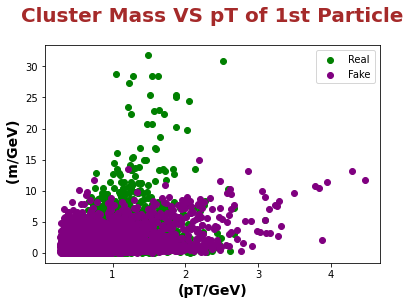

 Real Cluster pT freq : 6.0 [  6.  11.  26.  30.  25.  32.  48.  56.  57.  59.  76.  62.  71.  77.
  92.  76.  91. 101.  92.  76.  86.  90. 113.  91.  97. 104.  80.  89.
  80.  86.  84.  80.  75.  94.  84.  67.  72.  78.  68.  67.  67.  63.
  71.  63.  50.  53.  60.  60.  69.  63.  52.  42.  44.  48.  45.  54.
  50.  47.  42.  32.  42.  37.  31.  31.  49.  26.  38.  31.  38.  39.
  34.  41.  34.  36.  25.  28.  29.  38.  26.  19.  24.  18.  25.  27.
  25.  22.  24.  22.  26.  29.  36.  15.  23.  24.  19.  18.  20.  19.
  13.  21.  17.  15.  18.  18.  18.  17.  17.  12.  13.  12.  10.  13.
  14.  10.  10.   6.   9.  14.  14.  15.   8.   5.  12.   7.  10.   9.
  12.   8.   8.  13.   9.   7.  16.  12.  10.   7.   6.   8.   9.  11.
   5.   7.   4.   6.   9.   6.   2.   6.   8.   3.  11.   8.   8.   7.
   3.   7.   7.   5.   6.   2.   4.   6.   5.   4.   6.   8.   5.   7.
   6.   4.   4.  10.   6.   2.   2.   4.   6.   2.   5.   3.   2.   2.
   2.   6.   1.   4.   1.   5.   3.   1.   1.   6

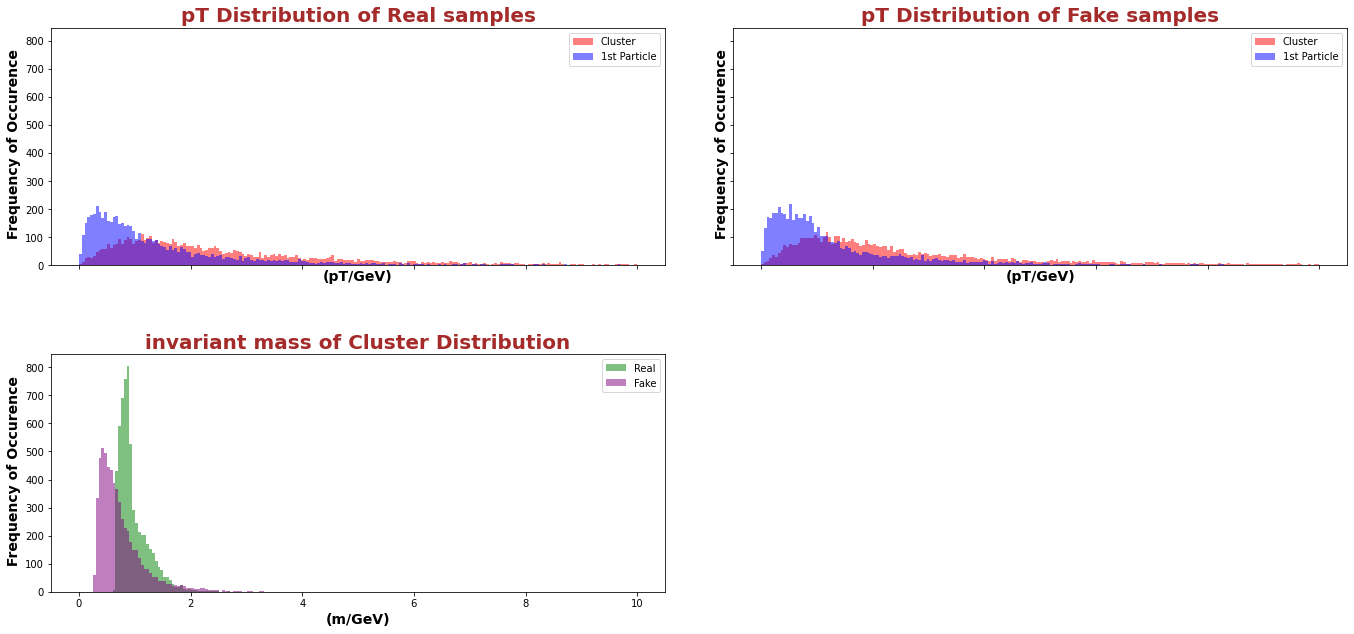

In [45]:
# Summarize perfomance for almost all samples included, plot graphs
summarize_performance(1,generator, discriminator, latent_dim, n=6000)

In [ ]:
#display2 fucntion plots the scatter plot of Sq. Mass of cluster VS Sq. pT of 1st Particle

In [26]:
def display2(X,Y):
  v=zeros((X.shape[0],2))
  i=0
  while i < X.shape[0]:
    v[i][0]= (X[i][0]*X[i][0])+(X[i][1]*X[i][1]) # px*px + py*py for Cluster
    v[i][1]= (X[i][3]*X[i][3])+(X[i][4]*X[i][4]) # px*px + py*py for Particle
    v[i][0]= np.sqrt(v[i][0])
    v[i][1]= np.sqrt(v[i][1])
    i=i+1
  #plt.subplot(1, 2, 1)
  #plt.hist(v[:,0],color='red',alpha=0.5,bins=np.linspace(0,1000000000*0.2*0.25*0.2,50)) # Red For Cluster
  #plt.hist(v[:,1],color='blue',alpha=0.5,bins=np.linspace(0,1000000000*0.2*0.25*0.2,50))  # Blue for Particle
  #plt.title('Squared pT Distribution of Real samples')
 

  w=zeros((Y.shape[0],2))
  i=0
  while i < Y.shape[0]:
    w[i][0]= (Y[i][0]*Y[i][0])+(Y[i][1]*Y[i][1]) # px*px + py*py for Cluster
    w[i][1]= (Y[i][3]*Y[i][3])+(Y[i][4]*Y[i][4]) # px*px + py*py for Particle
    w[i][0]= np.sqrt(w[i][0])
    w[i][1]= np.sqrt(w[i][1])
    i=i+1
  #plt.subplot(1, 2, 2)
  #plt.hist(w[:,0],color='red',alpha=0.5,bins=np.linspace(0,1000000000*0.2*0.25*0.2,50)) # Red For Cluster
  #plt.hist(w[:,1],color='blue',alpha=0.5,bins=np.linspace(0,1000000000*0.2*0.25*0.2,50))  # Blue for Particle
  #plt.title('Squared pT Distribution of Fake samples')

  g=zeros((X.shape[0],1))          # For Real Samples
  i=0
  while i < X.shape[0]:
    g[i][0]= calcmsqr(X[i][0],X[i][1],X[i][2],X[i][3],X[i][4],X[i][5],.13957,.13957)  # Calc Sq. Mass of cluster
    g[i][0]= np.sqrt(g[i][0])
    i=i+1
  
  h=zeros((Y.shape[0],1))         # For Fake Samples
  i=0
  while i < Y.shape[0]:
    h[i][0]= calcmsqr(Y[i][0],Y[i][1],Y[i][2],Y[i][3],Y[i][4],Y[i][5],.13957,.13957)  # Calc Sq. Mass of cluster
    h[i][0]= np.sqrt(h[i][0])
    i=i+1
  
 

  
  
  
  plt.scatter(g[:,0],v[:,1],color='green',label='Real') #
  plt.scatter(h[:,0],w[:,1],color='purple',label='Fake')  # 
  plt.title('Cluster Mass VS pT of 1st Particle',fontweight="bold",color='brown',fontsize=20,y=1.08)
  plt.xlabel("(pT/GeV)",fontweight="bold",color='black',fontsize=14)
  plt.ylabel(" (m/GeV)",fontweight="bold",color='black',fontsize=14)
  plt.legend() 
  
  #ax[1,1].axis('off')
  
  #fig.subplots_adjust(hspace=1000)
  #plt.tight_layout(pad =5)
  #plt.savefig('test_6.pdf')         #    These two lines to 
  #files.download('test_6.pdf')      #    Download data
  plt.show()

In [ ]:
# Following are just temporary codes still working on

In [ ]:
x,y =generate_fake_samples(generator,latent_dim,1000)
x

array([[ 1388.1224  ,  2552.996   ,  1811.8916  ,   351.27457 ,
         1518.9935  ,   693.7977  ],
       [-2716.2585  , -2568.6196  ,   993.0069  ,  -225.93944 ,
         -502.6875  ,   797.7005  ],
       [ 1395.9275  , -2165.753   , -2009.2065  ,   452.70667 ,
        -1968.316   , -1041.244   ],
       ...,
       [  -46.89472 , -1531.8854  , -1443.6812  ,   -19.85093 ,
         -151.8261  ,    61.821312],
       [ 1266.7194  ,  2286.062   ,  2480.6226  ,   160.42041 ,
          492.35257 ,   445.65872 ],
       [ -450.1111  ,  2089.386   , -1195.1248  ,  -310.72977 ,
          579.9929  ,  -310.37958 ]], dtype=float32)

In [ ]:
x,y =generate_real_samples(5)
x

array([[ 4572.93  ,  3686.39  ,  4805.3   ,   880.075 ,   664.043 ,
         1335.33  ],
       [ -147.916 ,   856.604 , -5119.06  ,  -437.668 ,   -41.2884,
        -1552.77  ],
       [ 4521.4   ,  -407.194 , -3624.56  ,  2818.98  ,  -334.81  ,
        -2858.45  ],
       [ 1633.    ,  1489.17  ,  2567.15  ,   611.858 ,   323.209 ,
         1447.88  ],
       [  701.114 ,    20.1217,  1035.85  ,   819.812 ,   -96.1213,
          489.503 ]])